In [2]:
import pandas as pd
import numpy
import torch
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Смотрим датасет

In [3]:
df = pd.read_csv("dataset.csv")
df_full = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)

In [4]:
df[df["Song_Success"]=="hit"]

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest,higher_guest,album_name,album_type,track_number,explicit,key_name,mode_name,key_mode,artists_all,remake,artist_id,album_id,download_link
0,5OFMeePbu2eEX1Hyf2tzYj,044 ROSE,hit,2017-06-23,0,1.748407,0.531356,0.677570,0.595927,1.209290,1.320058,1.661759,True,1,"0,1",1,ФОРМУЛА 1,single,1,True,G#,major,G# major,LIL MORTY; 044 ROSE,original,2V8aJ7qCArKAmHAX7u81Sj,4lsz5FpE3SFVuniECODcNN,https://p.scdn.co/mp3-preview/c37091967a02a815...
211,4yJaelCh3ZR9Gz3OxdcHgA,104,hit,2017-01-01,0,0.654708,1.524414,0.617797,1.327787,1.051860,0.715325,0.626434,True,3,"0,4,0,15,0,3",1,Сафари,album,8,True,G#,minor,G# minor,104; Truwer; Skryptonite; Maqlao,original,3Th60WEZwIWceINQVE4Ipx,4UmzyaeWkpwSktJoUJhNeM,https://p.scdn.co/mp3-preview/c3276badff384542...
213,5rUVxBANEvn1VWhniyQLxo,104,hit,2017-03-08,1,0.737043,0.562559,0.625968,0.616540,0.482883,0.958080,0.419900,True,7,"1,0,1,1",0,Open Season,single,4,True,D,major,D major,JILLZAY; Magg '98; Cheenah; Ben'z; Skryptonite...,original,3Th60WEZwIWceINQVE4Ipx,6yK6kjjUaUXVn4Ryuw04oG,https://p.scdn.co/mp3-preview/c2723c7a1c0f2988...
216,2z8QxqQ6Kesq4NFfi7A638,104,hit,2017-05-24,2,0.657312,0.516705,0.604218,0.997845,0.647074,0.878296,0.459343,True,1,"2,3",1,Праздник на улице 36,album,4,True,C#,major,C# major,Skryptonite; 104,original,3Th60WEZwIWceINQVE4Ipx,0QPnYmkBrXfNPjH74AdCiv,https://p.scdn.co/mp3-preview/0e537c88b7b9ad67...
218,0D22W2Vx8QSKm35waAGWJH,104,hit,2017-09-22,3,0.658381,0.758562,1.074633,0.629591,0.559644,0.692882,0.653821,True,1,"3,2",0,Сафари,album,6,True,B,minor,B minor,104; Truwer,original,3Th60WEZwIWceINQVE4Ipx,4UmzyaeWkpwSktJoUJhNeM,https://p.scdn.co/mp3-preview/5bd4eef854b56da5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14305,0cXmD7OpJfjmKP7zlrMQHS,хочуспать,hit,2020-04-15,0,1.334560,2.438916,0.925601,1.305833,1.001522,1.419632,2.103639,False,0,NaN,0,сонное царство,album,1,True,F,minor,F minor,хочуспать,original,5YCDUM10Wdtwa9yHr8wlcM,3XLgzuyEY4k0uIWni1BPud,https://p.scdn.co/mp3-preview/2e4d1c0b97bc1967...
14306,0M3ftvNRxlAgb585a5v4Iv,хочуспать,hit,2020-04-15,0,0.683778,2.339870,0.589495,0.595459,0.729488,0.590365,0.769191,False,0,NaN,0,сонное царство,album,2,True,F,major,F major,хочуспать,original,5YCDUM10Wdtwa9yHr8wlcM,3XLgzuyEY4k0uIWni1BPud,https://p.scdn.co/mp3-preview/1b01a48e78adc431...
14340,1L9gE6FdNtPSSTEk9sepcu,хочуспать,hit,2022-01-21,2,0.693301,0.832589,0.643443,0.532467,0.877243,0.650093,0.678127,True,1,2,0,airdrop,single,1,False,G#,major,G# major,хочуспать; КОСМОНАВТОВ НЕТ,original,5YCDUM10Wdtwa9yHr8wlcM,5gtlNTYLuwhcqUBXfuZfmB,https://p.scdn.co/mp3-preview/ab2f06f12f22aa6e...
14356,4jvw60Iw8LpSRJwy1sOmoB,Шайни,hit,2022-02-11,0,0.596221,1.032173,1.032283,1.664198,0.711896,2.007264,0.759171,False,0,NaN,0,Yeyo!,single,1,True,A,major,A major,Шайни,original,7gR1vQmVN37aNtYDE21Bae,4JRqVH5lhTM3maALKAsIzI,https://p.scdn.co/mp3-preview/75559722209dd3df...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14397 entries, 0 to 14396
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        14397 non-null  object 
 1   artist_name                     14397 non-null  object 
 2   Song_Success                    14397 non-null  object 
 3   album_release_date              14397 non-null  object 
 4   hit_n                           14397 non-null  int64  
 5   Drums_Energy                    14397 non-null  float64
 6   Drums_Complexity                14397 non-null  float64
 7   Variety_of_musical_instruments  14397 non-null  float64
 8   Mixing_Quality                  14397 non-null  float64
 9   Harmonic_Richness               14397 non-null  float64
 10  Mixing_Character                14397 non-null  float64
 11  Emotional_Intensity             14397 non-null  float64
 12  is_feat                         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hit_n,14397.0,5.386608,9.505574,0.000000,0.000000,2.000000,6.000000,89.000000
Drums_Energy,14397.0,0.972355,0.480462,0.496253,0.643001,0.794840,1.143002,7.112194
Drums_Complexity,14397.0,0.954692,0.511492,0.419928,0.601707,0.762102,1.127259,5.690766
Variety_of_musical_instruments,14397.0,0.971872,0.479238,0.525140,0.643664,0.778858,1.151429,6.588165
Mixing_Quality,14397.0,0.911119,0.577583,0.480746,0.575511,0.697751,1.028965,7.567636
Harmonic_Richness,14397.0,0.967866,0.519312,0.424486,0.644254,0.752720,1.099093,7.625900
Mixing_Character,14397.0,0.968142,0.503248,0.499828,0.638985,0.772543,1.120537,6.015559
Emotional_Intensity,14397.0,0.957314,0.485426,0.303615,0.645383,0.786170,1.145303,4.828630
n_feat,14397.0,0.517608,0.788514,0.000000,0.000000,0.000000,1.000000,8.000000
higher_guest,14397.0,0.096826,0.295731,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
df.head()

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest,higher_guest,album_name,album_type,track_number,explicit,key_name,mode_name,key_mode,artists_all,remake,artist_id,album_id,download_link
0,5OFMeePbu2eEX1Hyf2tzYj,044 ROSE,hit,2017-06-23,0,1.748407,0.531356,0.677570,0.595927,1.209290,1.320058,1.661759,True,1,"0,1",1,ФОРМУЛА 1,single,1,True,G#,major,G# major,LIL MORTY; 044 ROSE,original,2V8aJ7qCArKAmHAX7u81Sj,4lsz5FpE3SFVuniECODcNN,https://p.scdn.co/mp3-preview/c37091967a02a815...
1,29kkmN00FdzizRg5xrVmBF,044 ROSE,none,2017-12-08,1,0.714910,1.291384,0.735496,0.669723,0.673321,1.021614,0.460496,True,1,1,0,Mandolina (feat. 044 ROSE),single,1,True,C,major,C major,ВАЙС; 044 ROSE,original,2V8aJ7qCArKAmHAX7u81Sj,6jnftxbUPDmmpOgt9gdvFb,https://p.scdn.co/mp3-preview/04d4f628d8305b88...
2,7L1tQKY6mcy0sGXntrABgW,044 ROSE,none,2018-02-13,1,0.778734,0.574680,0.950734,0.516571,0.672520,0.746304,1.007762,False,0,NaN,0,Альбом 044,album,1,True,B,major,B major,044 ROSE,original,2T1bAXQppVRoSNm63zcvzI,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/a257eed4179821af...
3,4jwDiUBqLQCCuyWkbX87qN,044 ROSE,none,2018-02-13,1,1.291229,0.561352,0.688906,0.514869,1.160833,0.977034,1.069928,True,1,"1,2",1,Альбом 044,album,2,True,G#,major,G# major,044 ROSE; LIL MORTY,original,2V8aJ7qCArKAmHAX7u81Sj,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/91fedfb65d95d8bd...
4,2DYUk5AkUV7kPTvd58LVCw,044 ROSE,none,2018-02-13,1,0.900054,0.551893,0.600117,0.786980,0.530228,1.006494,0.458813,False,0,NaN,0,Альбом 044,album,3,True,B,minor,B minor,044 ROSE,original,2T1bAXQppVRoSNm63zcvzI,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/e312514b3efa7d10...


In [8]:
# смотрим количество пропусков
df.isnull().sum()

track_id                             0
artist_name                          0
Song_Success                         0
album_release_date                   0
hit_n                                0
Drums_Energy                         0
Drums_Complexity                     0
Variety_of_musical_instruments       0
Mixing_Quality                       0
Harmonic_Richness                    0
Mixing_Character                     0
Emotional_Intensity                  0
is_feat                              0
n_feat                               0
status_guest                      8656
higher_guest                         0
album_name                           0
album_type                           0
track_number                         0
explicit                             0
key_name                             8
mode_name                            8
key_mode                             8
artists_all                          0
remake                               0
artist_id                

# Визуализируем данные

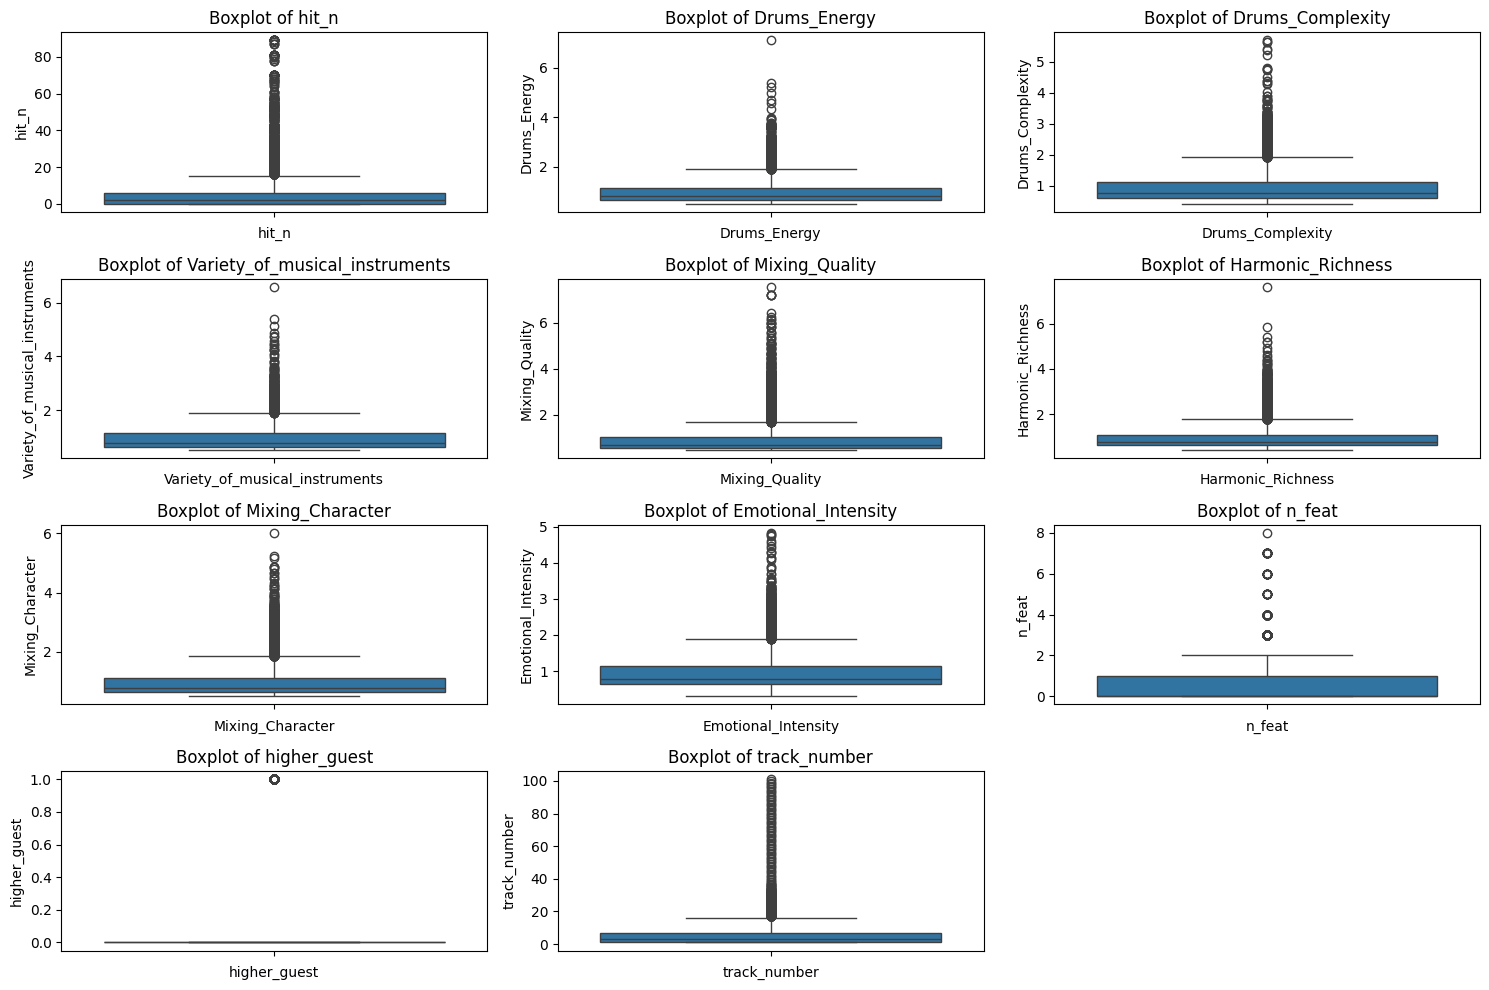

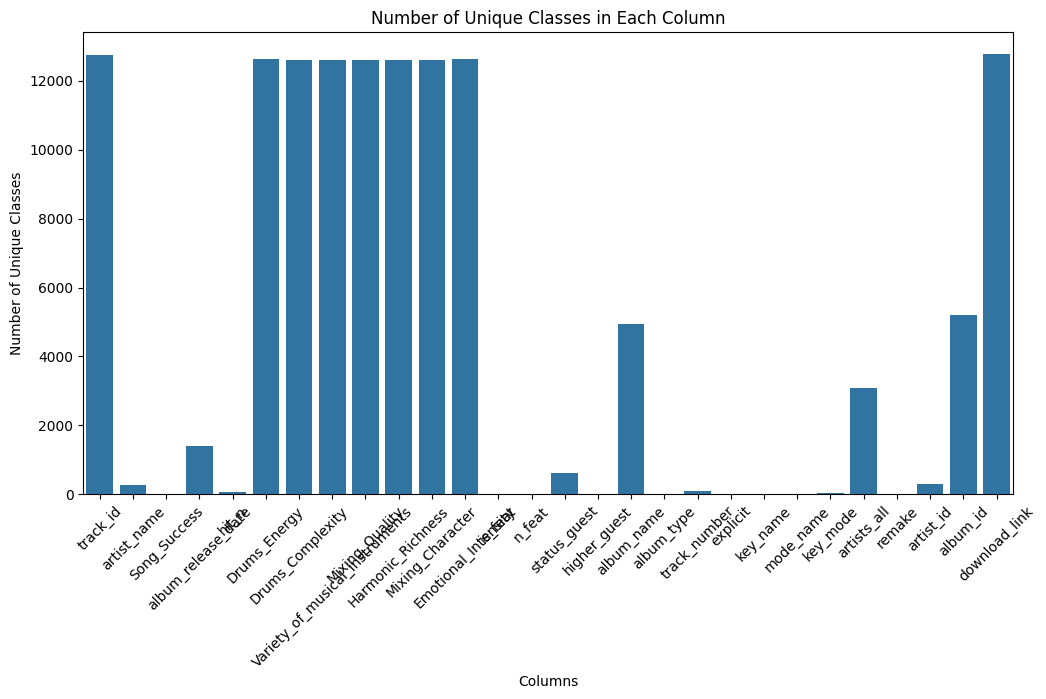

In [9]:
def visualize_data(df):
    # Убедитесь, что у вас есть хотя бы один числовой столбец для boxplot
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Создание boxplot для всех числовых столбцов
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns)//3 + 1, 3, i + 1)  # Подгоняем количество графиков по строкам и столбцам
        sns.boxplot(data=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

    # График количества уникальных классов в каждом столбце
    class_counts = df.nunique()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Number of Unique Classes in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Unique Classes')
    plt.xticks(rotation=45)
    plt.show()


visualize_data(df) 

# Очищаем датасет

In [10]:
from sklearn.preprocessing import LabelEncoder
# функция для очищения датасета

def clear_dataset(df):
    
    columns_to_drop = [
        'track_id', 'download_link', "artist_id", "album_id", "artists_all", "status_guest", "album_release_date", "track_number", "album_name" 
    ]
    
    df.drop(columns=columns_to_drop, inplace=True)

    df['Song_Success'] = df['Song_Success'].map({'none': 0, 'hit': 1})

    df['mode_name'].fillna(df['mode_name'].mode()[0], inplace=True)

    df['remake'] = df['remake'].map({'original': 1, 'live': 2, 'remix': 3, 'acoustic': 0})
    
    df['album_type'] = df['album_type'].map({'single': 2, 'compilation': 1, 'album': 0})
    
    df['mode_name'] = df['mode_name'].map({'major': 0, 'minor': 1})

    df['is_feat'] = df['is_feat'].map({False: 0, True: 1})

    df['explicit'] = df['explicit'].map({False: 0, True: 1})

    label_encoder_album = LabelEncoder()
    
    label_encoder_artist = LabelEncoder()

    df['artist_name'] = label_encoder_artist.fit_transform(df['artist_name'])

    df['key_name'] = label_encoder_album.fit_transform(df['key_name'])
    df['key_mode'] = label_encoder_artist.fit_transform(df['key_mode'])
    
    return df
    
clear_dataset(df)

print(df.isnull().sum())

artist_name                       0
Song_Success                      0
hit_n                             0
Drums_Energy                      0
Drums_Complexity                  0
Variety_of_musical_instruments    0
Mixing_Quality                    0
Harmonic_Richness                 0
Mixing_Character                  0
Emotional_Intensity               0
is_feat                           0
n_feat                            0
higher_guest                      0
album_type                        0
explicit                          0
key_name                          0
mode_name                         0
key_mode                          0
remake                            0
dtype: int64


/tmp/ipykernel_1319338/2325435002.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mode_name'].fillna(df['mode_name'].mode()[0], inplace=True)


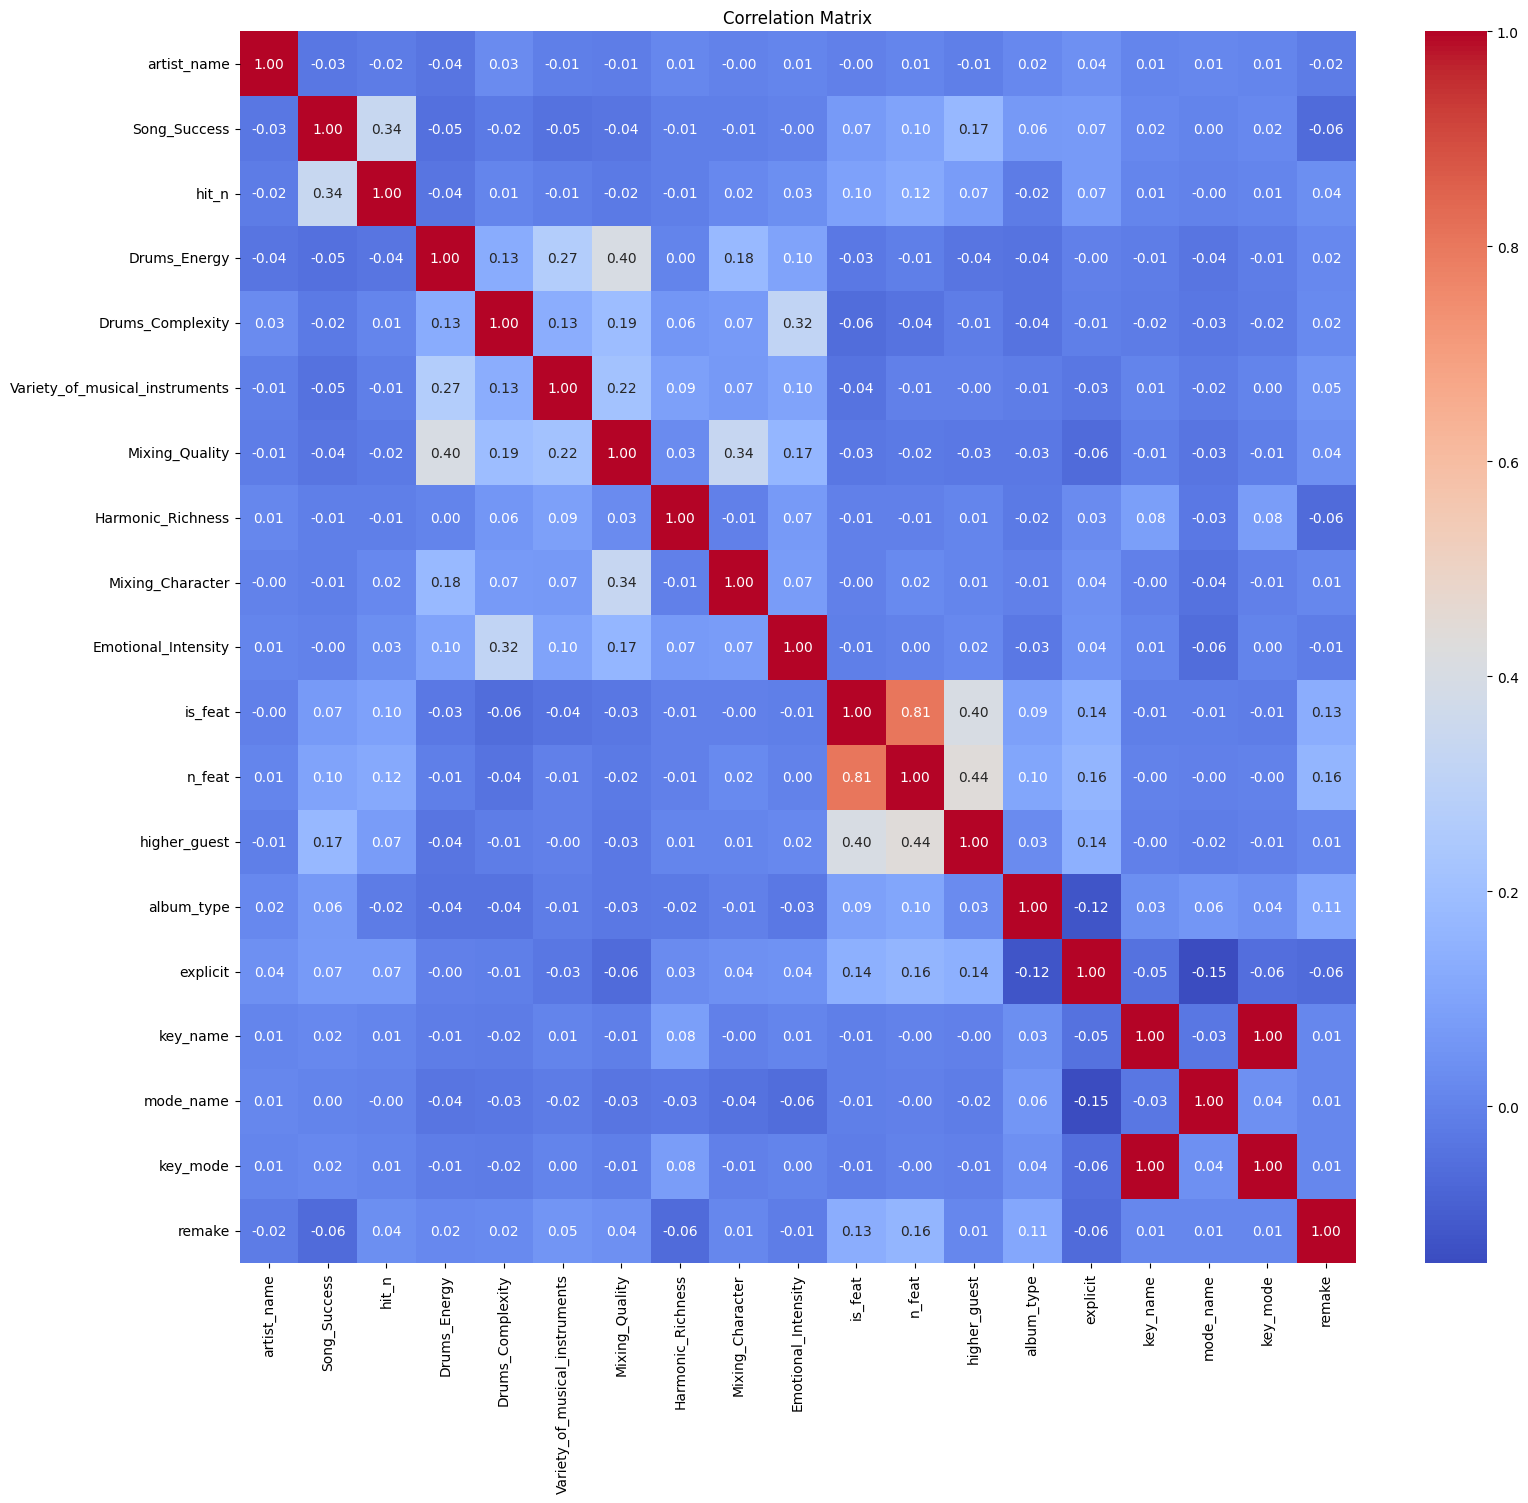

In [9]:
#смотрим корреляцию
corr_matrix = df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ДОПОЛНИТЕЛЬНАЯ ОБРАБОТКА

{'whiskers': [<matplotlib.lines.Line2D at 0x7a529198de10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a529198f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5291f6fe90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a52919a4050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a52919a48d0>],
 'means': []}

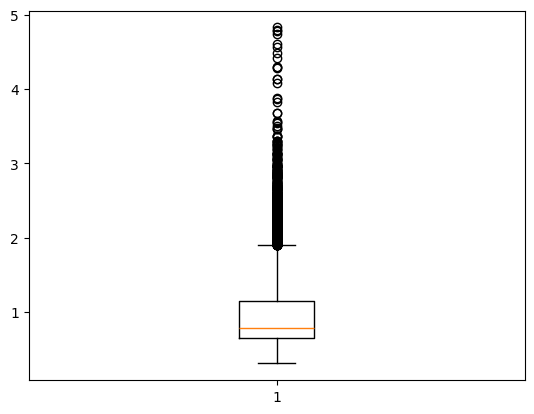

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(df["Emotional_Intensity"])

In [11]:
for i in df.columns:
    print(f"в столбце {i} уникальных значений {len(df[i].unique())}")

в столбце artist_name вот столько уникальных значений 282
в столбце Song_Success вот столько уникальных значений 2
в столбце hit_n вот столько уникальных значений 76
в столбце Drums_Energy вот столько уникальных значений 12623
в столбце Drums_Complexity вот столько уникальных значений 12613
в столбце Variety_of_musical_instruments вот столько уникальных значений 12601
в столбце Mixing_Quality вот столько уникальных значений 12605
в столбце Harmonic_Richness вот столько уникальных значений 12596
в столбце Mixing_Character вот столько уникальных значений 12596
в столбце Emotional_Intensity вот столько уникальных значений 12633
в столбце is_feat вот столько уникальных значений 2
в столбце n_feat вот столько уникальных значений 9
в столбце higher_guest вот столько уникальных значений 2
в столбце album_type вот столько уникальных значений 3
в столбце explicit вот столько уникальных значений 2
в столбце key_name вот столько уникальных значений 13
в столбце mode_name вот столько уникальных зн

# ОБУЧЕНИЕ МОДЕЛЕЙ

In [12]:
y = df['Song_Success']
df.drop(['Song_Success'], axis=1, inplace=True)
X = df

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

простой xgboost

In [14]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X, y)

y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f'Accuracy XGBoost: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1 Score: {f1_xgb}')

Accuracy XGBoost: 0.9555555555555556
Precision: 0.9557522123893806
Recall: 0.8
F1 Score: 0.8709677419354839


/home/sweepy/.local/share/pyenv/versions/3.11.10/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:13:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


catBoost


In [15]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_cat = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    l2_leaf_reg=3,  
    random_seed=42,
    task_type='GPU',  
    verbose=0
)

model_cat.fit(X, y)

y_pred_cat = model_cat.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print(f'Accuracy CatBoost: {accuracy_cat}')
print(f'Precision: {precision_cat}')
print(f'Recall: {recall_cat}')
print(f'F1 Score: {f1_cat}')

Accuracy CatBoost: 0.9270833333333334
Precision: 0.914572864321608
Recall: 0.674074074074074
F1 Score: 0.7761194029850746


VotingClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

model_rf = RandomForestClassifier(n_estimators=500, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', model_rf),
        ('xgboost', model_xgb),
        ('cat', model_cat)
    ],
    voting='soft'  
)

voting_clf.fit(X, y)

y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print(f'Accuracy Voting Classifier: {accuracy_voting}')
print(f'Precision: {precision_voting}')
print(f'Recall: {recall_voting}')
print(f'F1 Score: {f1_voting}')

/home/sweepy/.local/share/pyenv/versions/3.11.10/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Voting Classifier: 0.95625
Precision: 0.9559471365638766
Recall: 0.8037037037037037
F1 Score: 0.8732394366197183


PYTORCH

In [17]:
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Преобразование DataFrame в NumPy массивы
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()


# Преобразование NumPy массивов в тензоры PyTorch
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)  
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1)  
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).view(-1, 1)

# Создание набора данных и загрузчика данных для пакетной обработки
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

In [18]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Первый полносвязный слой: вход размерности X_train.shape[1], выход размерности 64
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Слой с 64 нейронами
        
        # Второй полносвязный слой: вход размерности 64 (выход из первого слоя), выход размерности 32
        self.fc2 = nn.Linear(64, 32)  # Слой с 32 нейронами
        
        # Третий полносвязный слой: вход размерности 32 (выход из второго слоя), выход размерности 1 (для бинарной классификации)
        self.fc3 = nn.Linear(32, 1)   # Выходной слой с одним нейроном

    def forward(self, x):
        # Применяем ReLU активацию к первому слою
        x = torch.relu(self.fc1(x)) 
        
        # Применяем ReLU активацию ко второму слою
        x = torch.relu(self.fc2(x))
        
        # Применяем сигмоидную активацию к выходному слою для получения вероятностей
        x = torch.sigmoid(self.fc3(x)) 
        
        return x

# Инициализация модели и перенос ее на выбранное устройство (CPU или GPU)
model = SimpleNN().to(device=device)

In [19]:
criterion = nn.BCELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

In [20]:
num_epochs = 200

for epoch in range(num_epochs):
    model.train()  
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device) 
        
        optimizer.zero_grad()  
        
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        
        loss.backward()  
        optimizer.step()  
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.3907
Epoch [20/100], Loss: 0.3841
Epoch [30/100], Loss: 0.3708
Epoch [40/100], Loss: 0.3703
Epoch [50/100], Loss: 0.3549
Epoch [60/100], Loss: 0.3410
Epoch [70/100], Loss: 0.3420
Epoch [80/100], Loss: 0.3166
Epoch [90/100], Loss: 0.2953
Epoch [100/100], Loss: 0.2727


In [21]:
model.eval()  

with torch.no_grad():  
    y_pred_prob = model(X_test_tensor.to(device))  

y_pred = (y_pred_prob >= 0.5).float()

accuracy = (y_pred.flatten() == y_test_tensor.flatten().to(device)).float().mean()
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8333
